In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

In [2]:
# read csv files
df_DA = pd.read_csv('Data_analyst_cleaned (1).csv')
df_BA = pd.read_csv('Business_Analyst_cleaned.csv')
df_DS = pd.read_csv('Data_Scientist_cleaned.csv')

In [3]:
# check the missing value counts for DA
# run the same code for BA and DS as well
missing_value_cnt = df_DA.isnull().sum()
missing_value_cnt

Unnamed: 0                0
Unnamed: 0.1              0
Unnamed: 0.1.1            0
Unnamed: 0.1.1.1          0
Unnamed: 0.1.1.1.1        0
Job_Title                 0
Salary_Estimate           0
Job_Description           0
Rating                    0
Company Name              1
Location                  0
Headquarters              0
Size                      0
Founded                   0
Type_of_ownership         0
Industry                  0
Sector                    0
Revenue                   0
Competitors               0
Easy Apply                0
Min_salary                0
Max_salary                0
max_salary                0
avg_salary                0
Avg_salary                0
Job_state                 0
Job_city                  0
headquarters_city         0
Same_state_hq_jl          0
Age                       0
python_jd                 0
Sql                       0
aws                       0
visualization             0
Project_Management        0
Database_Management 

In [4]:
# replace -1 or -1.0 to NaN
df_DA = df_DA.replace(-1,np.nan)
df_DA = df_DA.replace(-1.0,np.nan)
df_DA = df_DA.replace('-1',np.nan)

df_BA = df_BA.replace(-1,np.nan)
df_BA = df_BA.replace(-1.0,np.nan)
df_BA = df_BA.replace('-1',np.nan)

df_DS = df_DS.replace(-1,np.nan)
df_DS = df_DS.replace(-1.0,np.nan)
df_DS = df_DS.replace('-1',np.nan)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


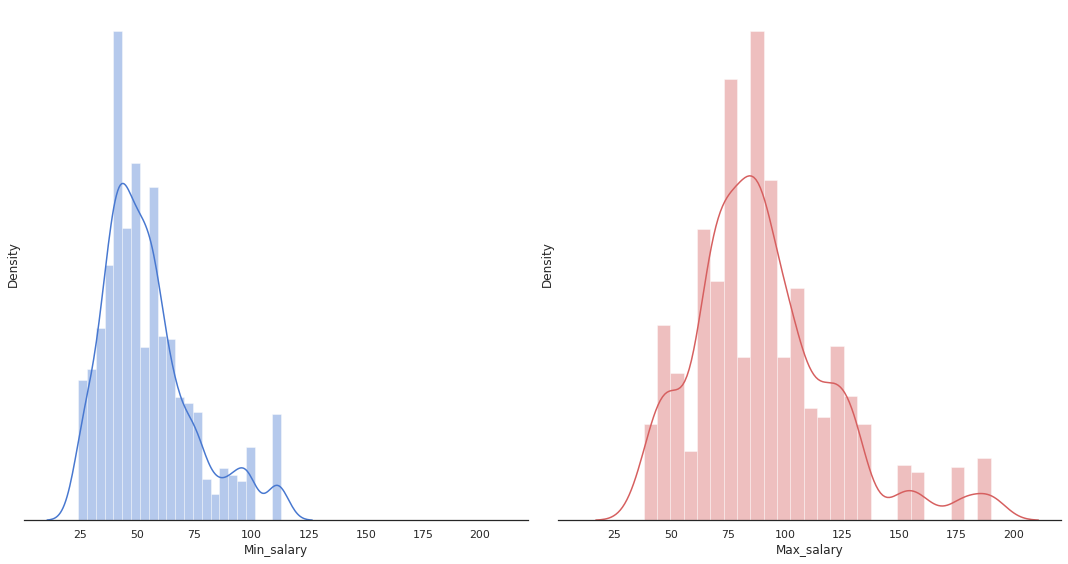

In [5]:
# Plot the min and max salary distributions for DA
# use the same code to plot distributions for BA and DS
data_analyst = df_DA[df_DA['job_simp'] == 'data analyst']

sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 2, figsize=(15, 8), sharex=True)
sns.despine(left=True)

#Plot a histogram and kernel density estimate
sns.distplot(data_analyst['Min_salary'], color="b", ax=axes[0])
sns.distplot(data_analyst['Max_salary'], color="r",ax=axes[1])

plt.setp(axes, yticks=[])
plt.tight_layout()

### Industry

In [6]:
df_DA['Industry'].value_counts()

IT Services                            325
Staffing & Outsourcing                 322
Health Care Services & Hospitals       151
Consulting                             111
Computer Hardware & Software           111
                                      ... 
Catering & Food Service Contractors      1
Metals Brokers                           1
Consumer Product Rental                  1
Truck Rental & Leasing                   1
Sporting Goods Stores                    1
Name: Industry, Length: 88, dtype: int64

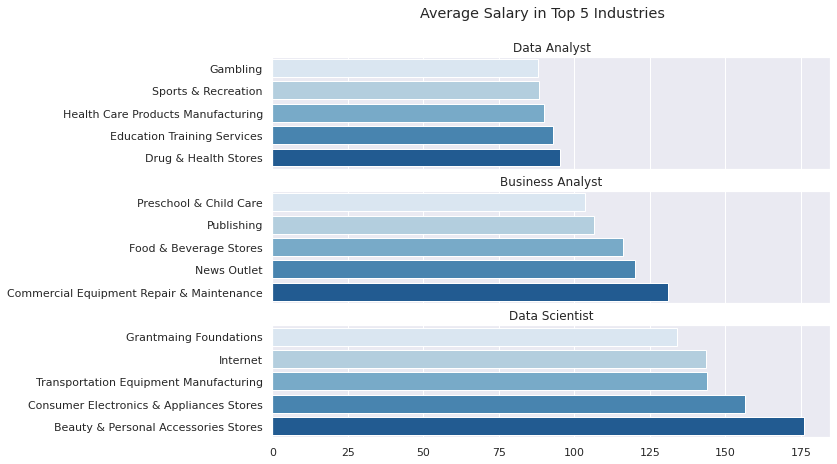

In [7]:
# Compare the average salary in top5 industries for DA, BA and DS
sns.set_style('darkgrid')
DA_indus_avg = df_DA.groupby(['Industry'])['avg_salary'].mean().sort_values(ascending=True).reset_index()
BA_indus_avg = df_BA.groupby(['Industry'])['Avg_salary'].mean().sort_values(ascending=True).reset_index()
DS_indus_avg = df_DS.groupby(['Industry'])['Avg_salary'].mean().sort_values(ascending=True).reset_index()


fig, axes = plt.subplots(3, 1, sharex=True, figsize=(10,7))
fig.suptitle('Average Salary in Top 5 Industries')


DA_indus_plot = sns.barplot(ax=axes[0], data = DA_indus_avg.tail(5), x = 'avg_salary', y = 'Industry', palette = "Blues")
axes[0].set_title("Data Analyst")
axes[0].set(xlabel='', ylabel='')

BA_indus_plot = sns.barplot(ax=axes[1], data = BA_indus_avg.tail(5), x = 'Avg_salary', y = 'Industry', palette = "Blues")
axes[1].set_title("Business Analyst")
axes[1].set(xlabel='', ylabel='')

DS_indus_plot = sns.barplot(ax=axes[2], data = DS_indus_avg.tail(5), x = 'Avg_salary', y = 'Industry', palette = "Blues")
axes[2].set_title("Data Scientist")
axes[2].set(xlabel='', ylabel='')

plt.savefig('top5 industries salary.png', dpi=400, bbox_inches='tight')

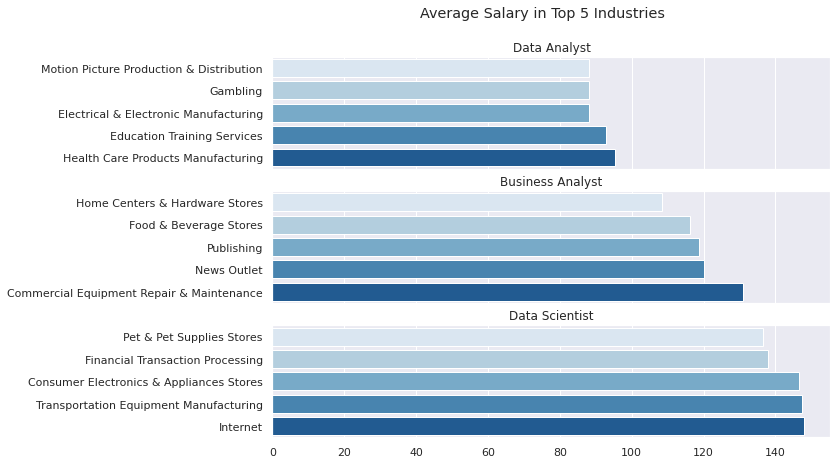

In [8]:
# exclude "seniority" and see if there's any difference
sns.set_style('darkgrid')

DA_indus_avg_j = df_DA.loc[(df_DA.Seniority != "senior")]
BA_indus_avg_j = df_BA.loc[(df_BA.Seniority != "senior")]
DS_indus_avg_j = df_DS.loc[(df_DS.Seniority != "senior")]
DA_indus_avg_j = DA_indus_avg_j.groupby(['Industry'])['avg_salary'].mean().sort_values(ascending=True).reset_index()
BA_indus_avg_j = BA_indus_avg_j.groupby(['Industry'])['Avg_salary'].mean().sort_values(ascending=True).reset_index()
DS_indus_avg_j = DS_indus_avg_j.groupby(['Industry'])['Avg_salary'].mean().sort_values(ascending=True).reset_index()

fig, axes = plt.subplots(3, 1, sharex=True, figsize=(10,7))
fig.suptitle('Average Salary in Top 5 Industries')

DA_indus_plot = sns.barplot(ax=axes[0], data = DA_indus_avg_j.tail(5), x = 'avg_salary', y = 'Industry', palette = "Blues")
axes[0].set_title("Data Analyst")
axes[0].set(xlabel='', ylabel='')

BA_indus_plot = sns.barplot(ax=axes[1], data = BA_indus_avg_j.tail(5), x = 'Avg_salary', y = 'Industry', palette = "Blues")
axes[1].set_title("Business Analyst")
axes[1].set(xlabel='', ylabel='')

DS_indus_plot = sns.barplot(ax=axes[2], data = DS_indus_avg_j.tail(5), x = 'Avg_salary', y = 'Industry', palette = "Blues")
axes[2].set_title("Data Scientist")
axes[2].set(xlabel='', ylabel='')

plt.savefig('top5 industries salary.png', dpi=400, bbox_inches='tight')

Text(0.5, 1.0, 'Data Scientist')

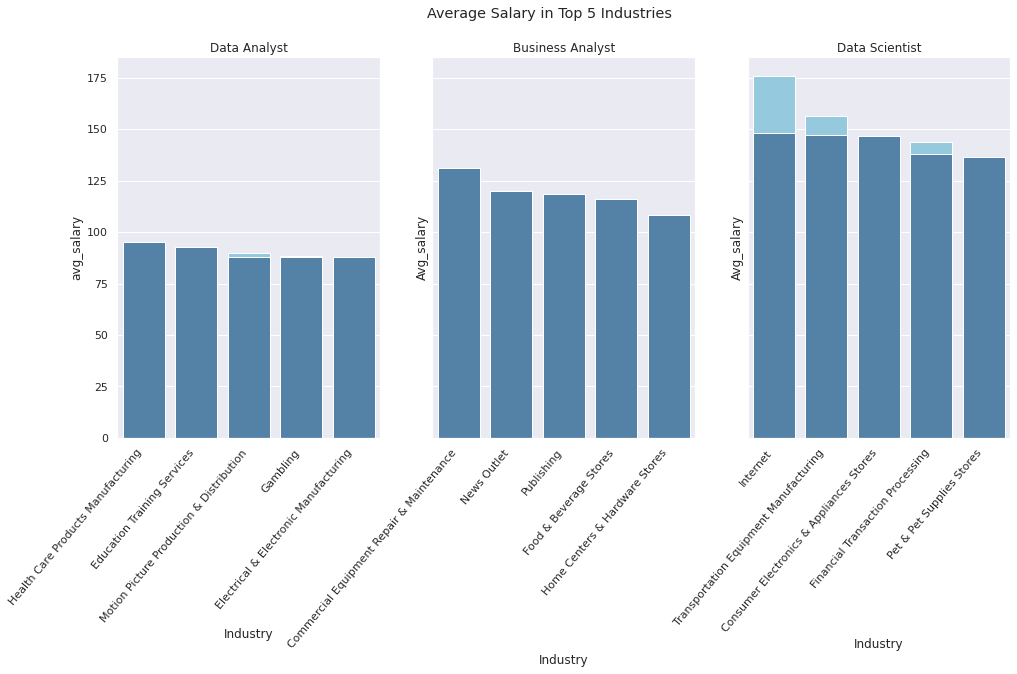

In [9]:
# stack the results from the above two plots to observe the difference
# does "seniority" makes a difference on the average salary in the top industries?
sns.set_style('darkgrid',)

DA_indus_avg = df_DA.groupby(['Industry'])['avg_salary'].mean().sort_values(ascending=False).reset_index()
BA_indus_avg = df_BA.groupby(['Industry'])['Avg_salary'].mean().sort_values(ascending=False).reset_index()
DS_indus_avg = df_DS.groupby(['Industry'])['Avg_salary'].mean().sort_values(ascending=False).reset_index()

DA_indus_avg_j = df_DA.loc[(df_DA.Seniority != "senior")]
BA_indus_avg_j = df_BA.loc[(df_BA.Seniority != "senior")]
DS_indus_avg_j = df_DS.loc[(df_DS.Seniority != "senior")]
DA_indus_avg_j = DA_indus_avg_j.groupby(['Industry'])['avg_salary'].mean().sort_values(ascending=False).reset_index()
BA_indus_avg_j = BA_indus_avg_j.groupby(['Industry'])['Avg_salary'].mean().sort_values(ascending=False).reset_index()
DS_indus_avg_j = DS_indus_avg_j.groupby(['Industry'])['Avg_salary'].mean().sort_values(ascending=False).reset_index()

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(16,7))
fig.suptitle('Average Salary in Top 5 Industries')

DA_indus_plot = sns.barplot(ax=axes[0], data = DA_indus_avg.head(5), x = 'Industry', y = 'avg_salary', color = "skyblue")
DA_indus_plot = sns.barplot(ax=axes[0], data = DA_indus_avg_j.head(5), x = 'Industry', y = 'avg_salary', color = "steelblue")
DA_indus_plot = DA_indus_plot.set_xticklabels(DA_indus_plot.get_xticklabels(), rotation=50, horizontalalignment = "right")
axes[0].set_title("Data Analyst")

BA_indus_plot = sns.barplot(ax=axes[1], data = BA_indus_avg.head(5), x = 'Industry', y = 'Avg_salary', color = "skyblue")
BA_indus_plot = sns.barplot(ax=axes[1], data = BA_indus_avg_j.head(5), x = 'Industry', y = 'Avg_salary', color = "steelblue")
BA_indus_plot = BA_indus_plot.set_xticklabels(BA_indus_plot.get_xticklabels(), rotation=50, horizontalalignment = "right")
axes[1].set_title("Business Analyst")

DS_indus_plot = sns.barplot(ax=axes[2], data = DS_indus_avg.head(5), x = 'Industry', y = 'Avg_salary', color = "skyblue")
DS_indus_plot = sns.barplot(ax=axes[2], data = DS_indus_avg_j.head(5), x = 'Industry', y = 'Avg_salary', color = "steelblue")
DS_indus_plot = DS_indus_plot.set_xticklabels(DS_indus_plot.get_xticklabels(), rotation=50, horizontalalignment = "right")
axes[2].set_title("Data Scientist")

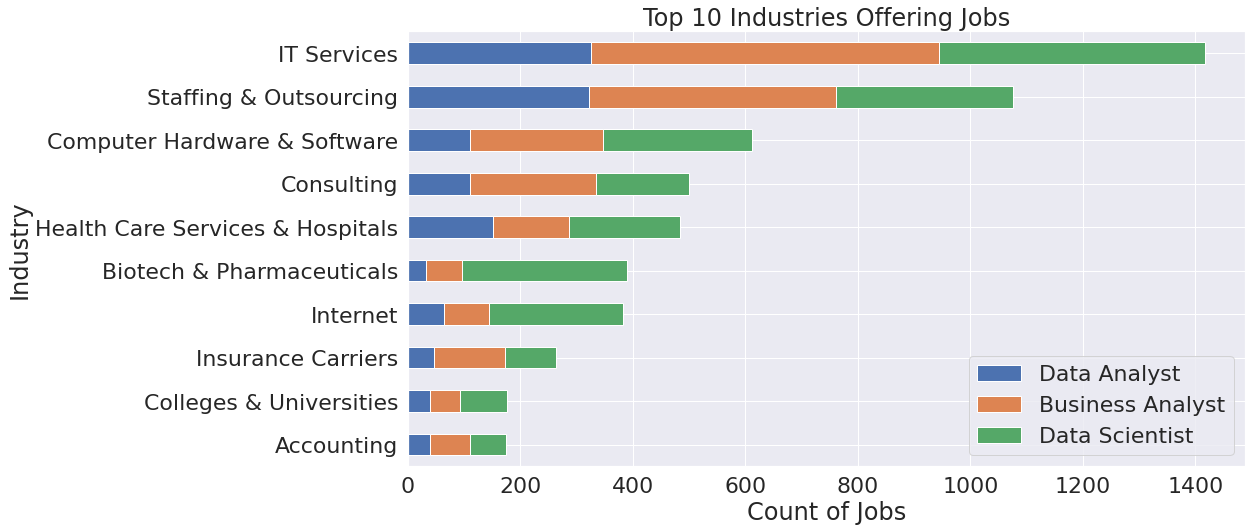

In [10]:
# plot the top 10 industries offering jobs for DA, BA, and DS
DA_indus_count = df_DA.Industry.value_counts().sort_values(ascending=False).reset_index()
BA_indus_count = df_BA.Industry.value_counts().sort_values(ascending=False).reset_index()
DS_indus_count = df_DS.Industry.value_counts().sort_values(ascending=False).reset_index()

merge_count = pd.merge(DA_indus_count, BA_indus_count, on = 'index').merge(DS_indus_count, on = 'index')
merge_count["sum_counts"] = merge_count.Industry_x + merge_count.Industry_y + merge_count.Industry
merge_count = merge_count.sort_values(by = 'sum_counts', ascending=True).drop(columns = 'sum_counts')

sns.set_style('darkgrid')
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
merge_count.tail(10).plot(x = 'index', kind='barh', stacked=True)

plt.title("Top 10 Industries Offering Jobs")
plt.xlabel("Count of Jobs")
plt.ylabel("Industry")
plt.legend(['Data Analyst', 'Business Analyst', 'Data Scientist'])
plt.savefig('top10 industries jobs.png', dpi=600, bbox_inches='tight')

### Sectors

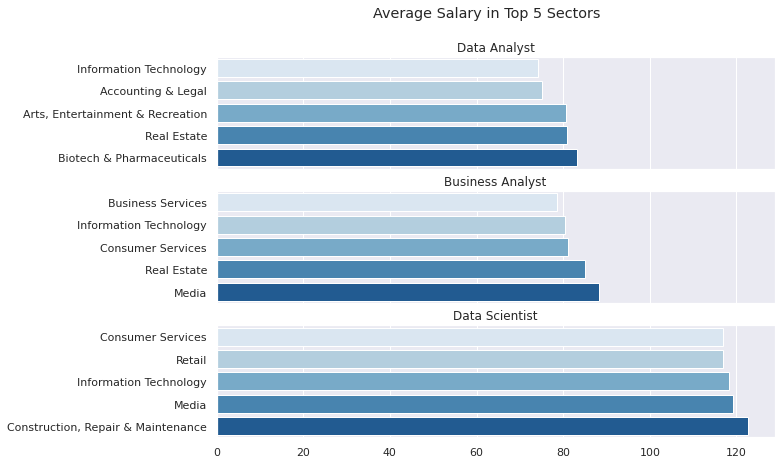

In [11]:
# Compare the average salary in top5 sectors for DA, BA and DS
sns.set_style('darkgrid')

DA_sector_avg = df_DA.groupby(['Sector'])['Avg_salary'].mean().sort_values(ascending=True).reset_index()
BA_sector_avg = df_BA.groupby(['Sector'])['Avg_salary'].mean().sort_values(ascending=True).reset_index()
DS_sector_avg = df_DS.groupby(['Sector'])['Avg_salary'].mean().sort_values(ascending=True).reset_index()

sns.set(font_scale=1)
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(10,7))
fig.suptitle('Average Salary in Top 5 Sectors')

DA_sector_plot = sns.barplot(ax=axes[0], data = DA_sector_avg.tail(5), x = 'Avg_salary', y = 'Sector', palette = "Blues")
axes[0].set_title("Data Analyst")
axes[0].set(xlabel='', ylabel='')

BA_sector_plot = sns.barplot(ax=axes[1], data = BA_sector_avg.tail(5), x = 'Avg_salary', y = 'Sector', palette = "Blues")
axes[1].set_title("Business Analyst")
axes[1].set(xlabel='', ylabel='')

DS_sector_plot = sns.barplot(ax=axes[2], data = DS_sector_avg.tail(5), x = 'Avg_salary', y = 'Sector', palette = "Blues")
axes[2].set_title("Data Scientist")
axes[2].set(xlabel='', ylabel='')

plt.savefig('top5 sector salary.png', dpi=400, bbox_inches='tight')

Text(0.5, 1.0, 'Data Scientist')

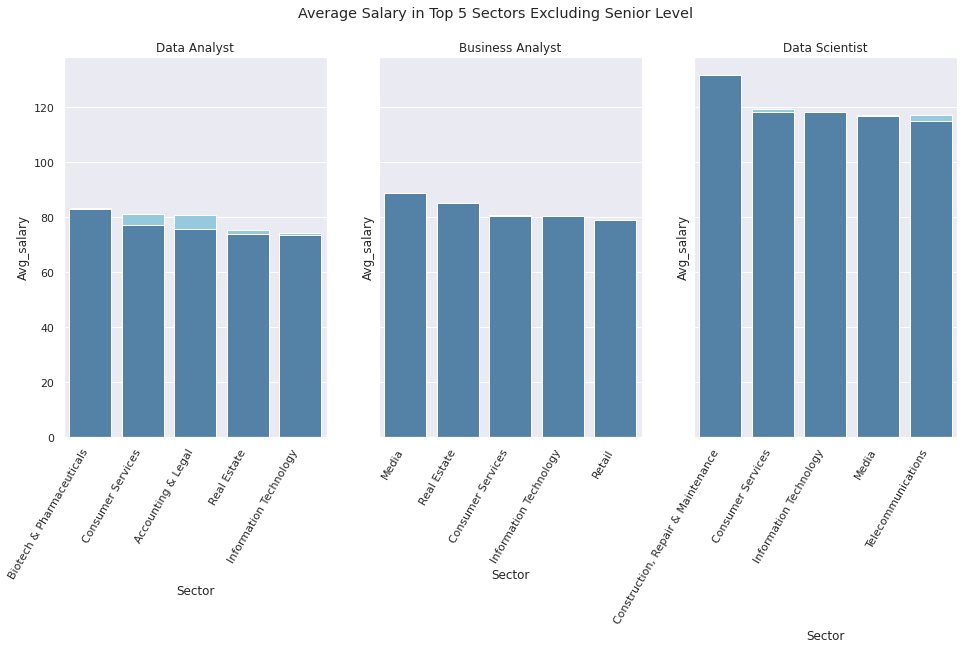

In [12]:
# stack the results from the average salary with/without "seniority" to observe the difference
# does "seniority" makes a difference on the average salary in the top sectors?
sns.set_style('darkgrid')

DA_sector_avg = df_DA.groupby(['Sector'])['Avg_salary'].mean().sort_values(ascending=False).reset_index()
BA_sector_avg = df_BA.groupby(['Sector'])['Avg_salary'].mean().sort_values(ascending=False).reset_index()
DS_sector_avg = df_DS.groupby(['Sector'])['Avg_salary'].mean().sort_values(ascending=False).reset_index()

DA_sector_avg_j = df_DA.loc[(df_DA.Seniority != "senior")]
BA_sector_avg_j = df_BA.loc[(df_BA.Seniority != "senior")]
DS_sector_avg_j = df_DS.loc[(df_DS.Seniority != "senior")]
DA_sector_avg_j = DA_sector_avg_j.groupby(['Sector'])['Avg_salary'].mean().sort_values(ascending=False).reset_index()
BA_sector_avg_j = BA_sector_avg_j.groupby(['Sector'])['Avg_salary'].mean().sort_values(ascending=False).reset_index()
DS_sector_avg_j = DS_sector_avg_j.groupby(['Sector'])['Avg_salary'].mean().sort_values(ascending=False).reset_index()

sns.set(font_scale=1)
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(16,7))
fig.suptitle('Average Salary in Top 5 Sectors Excluding Senior Level')

DA_sector_plot = sns.barplot(ax=axes[0], data = DA_sector_avg.head(5), x = 'Sector', y = 'Avg_salary', color = "skyblue")
DA_sector_plot = sns.barplot(ax=axes[0], data = DA_sector_avg_j.head(5), x = 'Sector', y = 'Avg_salary', color = "steelblue")
DA_sector_plot = DA_sector_plot.set_xticklabels(DA_sector_plot.get_xticklabels(), rotation=60, horizontalalignment = "right")
axes[0].set_title("Data Analyst")

BA_sector_plot = sns.barplot(ax=axes[1], data = DA_sector_avg.head(5), x = 'Sector', y = 'Avg_salary', color = "skyblue")
BA_sector_plot = sns.barplot(ax=axes[1], data = BA_sector_avg_j.head(5), x = 'Sector', y = 'Avg_salary', color = "steelblue")
BA_sector_plot = BA_sector_plot.set_xticklabels(BA_sector_plot.get_xticklabels(), rotation=60, horizontalalignment = "right")
axes[1].set_title("Business Analyst")

DS_sector_plot = sns.barplot(ax=axes[2], data = DS_sector_avg.head(5), x = 'Sector', y = 'Avg_salary', color = "skyblue")
DS_sector_plot = sns.barplot(ax=axes[2], data = DS_sector_avg_j.head(5), x = 'Sector', y = 'Avg_salary', color = "steelblue")
DS_sector_plot = DS_sector_plot.set_xticklabels(DS_sector_plot.get_xticklabels(), rotation=60, horizontalalignment = "right")
axes[2].set_title("Data Scientist")

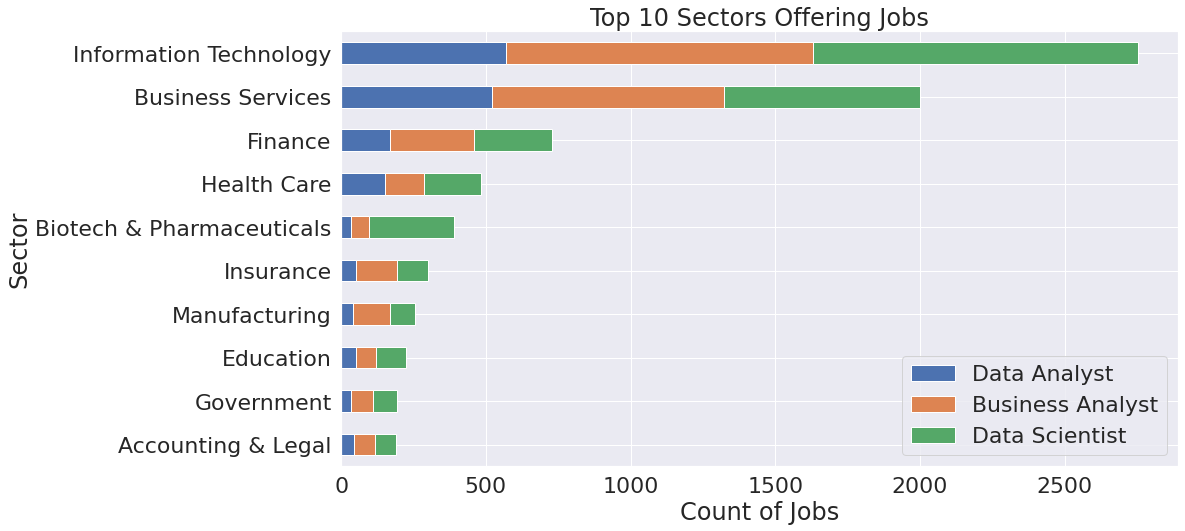

In [13]:
# plot the top 10 sectors offering jobs for DA, BA, and DS
DA_sector_count = df_DA.Sector.value_counts().sort_values(ascending=False).reset_index()
BA_sector_count = df_BA.Sector.value_counts().sort_values(ascending=False).reset_index()
DS_sector_count = df_DS.Sector.value_counts().sort_values(ascending=False).reset_index()

merge_sector_count = pd.merge(DA_sector_count, BA_sector_count, on = 'index').merge(DS_sector_count, on = 'index')
merge_sector_count["sum_counts"] = merge_sector_count.Sector_x + merge_sector_count.Sector_y + merge_sector_count.Sector
merge_sector_count = merge_sector_count.sort_values(by = 'sum_counts', ascending=True).drop(columns = 'sum_counts')

sns.set_style('darkgrid')
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
merge_sector_count.tail(10).plot(x = 'index', kind='barh', stacked=True)

plt.title("Top 10 Sectors Offering Jobs")
plt.xlabel("Count of Jobs")
plt.ylabel("Sector")
plt.legend(['Data Analyst', 'Business Analyst', 'Data Scientist'])

                        Sector                              Industry  0_x  \
56           Consumer Services               Consumer Product Rental    1   
61                       Media                           News Outlet    1   
58                      Retail                 Sporting Goods Stores    1   
57  Transportation & Logistics             Express Delivery Services    1   
49                      Retail  Beauty & Personal Accessories Stores    2   
..                         ...                                   ...  ...   
2                  Health Care      Health Care Services & Hospitals  151   
3            Business Services                            Consulting  111   
4       Information Technology          Computer Hardware & Software  111   
1            Business Services                Staffing & Outsourcing  322   
0       Information Technology                           IT Services  325   

    0_y    0  
56    1    1  
61    1    2  
58    2    1  
57    1    2  


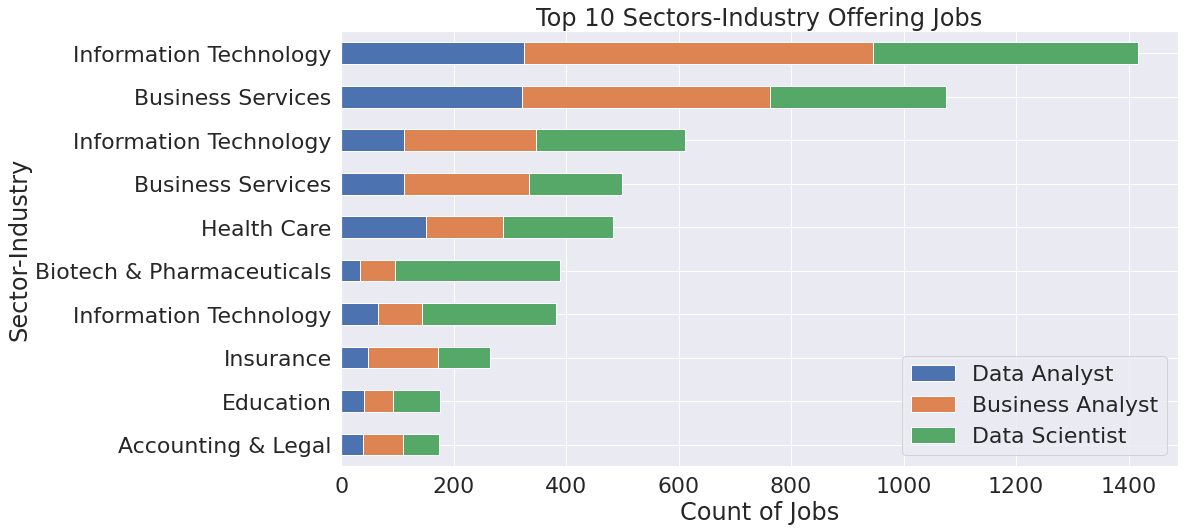

In [14]:
# group by 'Sector' and 'Industry' and observe the top 10 sectors-industry combination that offers jobs
df_DA.dropna()
df_BA.dropna()
df_DS.dropna()

DA_group_count = df_DA.groupby(['Sector', 'Industry']).size().sort_values(ascending=False).reset_index()
BA_group_count = df_BA.groupby(['Sector', 'Industry']).size().sort_values(ascending=False).reset_index()
DS_group_count = df_DS.groupby(['Sector', 'Industry']).size().sort_values(ascending=False).reset_index()

merge_group_count = pd.merge(DA_group_count, BA_group_count, on = ['Sector', 'Industry']).merge(DS_group_count, on = ['Sector', 'Industry'])
merge_group_count["sum_counts"] = merge_group_count['0_x'] + merge_group_count['0_y'] + merge_group_count[0]
merge_group_count = merge_group_count.sort_values(by = 'sum_counts', ascending=True).drop(columns = 'sum_counts')

print(merge_group_count)

sns.set_style('darkgrid')
merge_group_count.tail(10).plot(x = 'Sector', kind='barh', stacked=True)

plt.title("Top 10 Sectors-Industry Offering Jobs")
plt.xlabel("Count of Jobs")
plt.ylabel("Sector-Industry")
plt.legend(['Data Analyst', 'Business Analyst', 'Data Scientist'])